<a href="https://colab.research.google.com/github/MrRD1962/RD/blob/main/salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [34]:
warnings.filterwarnings('ignore')


In [35]:
try:
    df = pd.read_csv('/content/adult 3.csv')
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: '/content/adult 3.csv' not found. Please ensure the file path is correct.")
    exit()


Data loaded successfully!


In [36]:
print("\n--- Initial Data Info ---")
df.info()

print("\n--- First 5 Rows ---")
print(df.head())


--- Initial Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB

--- First 5 Rows ---
   age  workclass  fnlwgt  

In [37]:
df.replace('?', np.nan, inplace=True)

In [38]:
for column in df.columns:
    if df[column].isnull().any():
        if df[column].dtype == 'object':  # Check if it's a categorical column
            mode_val = df[column].mode()[0]
            df[column].fillna(mode_val, inplace=True)
            print(f"Imputed missing values in '{column}' with mode: '{mode_val}'")


Imputed missing values in 'workclass' with mode: 'Private'
Imputed missing values in 'occupation' with mode: 'Prof-specialty'
Imputed missing values in 'native-country' with mode: 'United-States'


In [39]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

In [40]:
X = df.drop('income', axis=1)
y = df['income']

In [41]:
le = LabelEncoder()
y = le.fit_transform(y)  # <=50K -> 0, >50K -> 1
print(f"\nTarget variable mapping: {list(le.classes_)} -> {list(range(len(le.classes_)))}")



Target variable mapping: ['<=50K', '>50K'] -> [0, 1]


In [42]:
categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns


In [43]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')


In [44]:
preprocessor = ColumnTransformer(
    transformers=[('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [46]:
print(f"\nTraining data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")



Training data shape: (39073, 14), (39073,)
Testing data shape: (9769, 14), (9769,)


In [47]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)}
results = {}


In [48]:
print("\n--- Training and Evaluating Models ---")
for name, model in models.items():
    print(f"\nTraining {name}...")
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]



--- Training and Evaluating Models ---

Training Logistic Regression...

Training Random Forest...

Training Gradient Boosting...


In [49]:
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc}


In [50]:
print(f"{name} Performance:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-Score: {f1:.4f}")
print(f"  ROC-AUC: {roc_auc:.4f}")
print("  Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print("  Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Gradient Boosting Performance:
  Accuracy: 0.8676
  Precision: 0.7970
  Recall: 0.5997
  F1-Score: 0.6844
  ROC-AUC: 0.9214
  Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.92      7431
        >50K       0.80      0.60      0.68      2338

    accuracy                           0.87      9769
   macro avg       0.84      0.78      0.80      9769
weighted avg       0.86      0.87      0.86      9769

  Confusion Matrix:
[[7074  357]
 [ 936 1402]]


In [51]:
print("\n--- All Model Results ---")
results_df = pd.DataFrame(results).T
print(results_df)


--- All Model Results ---
                   Accuracy  Precision    Recall  F1-Score   ROC-AUC
Gradient Boosting  0.867643   0.797044  0.599658  0.684403  0.921426


In [52]:
print("\n--- Hyperparameter Tuning for Random Forest ---")
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))])





--- Hyperparameter Tuning for Random Forest ---


In [53]:
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]}


In [54]:
from sklearn.model_selection import RandomizedSearchCV

# Use RandomizedSearchCV instead of GridSearchCV
grid_search_rf = RandomizedSearchCV(rf_pipeline, param_grid_rf, cv=3, n_jobs=-1, verbose=1, scoring='roc_auc', n_iter=10, random_state=42)
grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object'))])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [10, 20, None],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200]},
             scoring='roc_auc', verbose=1)

In [55]:
print(f"\nBest parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best ROC-AUC score for Random Forest: {grid_search_rf.best_score_:.4f}")


Best parameters for Random Forest: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best ROC-AUC score for Random Forest: 0.9163


In [56]:
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test)
y_proba_rf_tuned = best_rf_model.predict_proba(X_test)[:, 1]


In [57]:
print("\n--- Tuned Random Forest Performance on Test Set ---")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_rf_tuned):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_rf_tuned):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_rf_tuned):.4f}")
print(f"  F1-Score: {f1_score(y_test, y_pred_rf_tuned):.4f}")
print(f"  ROC-AUC: {roc_auc_score(y_test, y_proba_rf_tuned):.4f}")
print("  Classification Report:")
print(classification_report(y_test, y_pred_rf_tuned, target_names=le.classes_))
print("  Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_tuned))



--- Tuned Random Forest Performance on Test Set ---
  Accuracy: 0.8658
  Precision: 0.7991
  Recall: 0.5868
  F1-Score: 0.6767
  ROC-AUC: 0.9179
  Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.92      7431
        >50K       0.80      0.59      0.68      2338

    accuracy                           0.87      9769
   macro avg       0.84      0.77      0.80      9769
weighted avg       0.86      0.87      0.86      9769

  Confusion Matrix:
[[7086  345]
 [ 966 1372]]


In [58]:
print("\n--- Feature Importance from Tuned Random Forest ---")
preprocessor.fit(X_train)
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = list(numerical_features) + list(ohe_feature_names)




--- Feature Importance from Tuned Random Forest ---


In [60]:
importances = best_rf_model.named_steps['classifier'].feature_importances_


In [61]:
feature_importances = pd.Series(importances, index=all_feature_names)
feature_importances = feature_importances.sort_values(ascending=False)

In [62]:
print(feature_importances.head(15))

capital-gain                         0.152063
marital-status_Married-civ-spouse    0.109125
educational-num                      0.100438
relationship_Husband                 0.089603
age                                  0.075630
hours-per-week                       0.055280
marital-status_Never-married         0.047663
capital-loss                         0.044387
fnlwgt                               0.034629
occupation_Exec-managerial           0.027030
education_Bachelors                  0.019835
relationship_Wife                    0.018881
relationship_Not-in-family           0.016854
education_Masters                    0.014748
gender_Male                          0.014482
dtype: float64


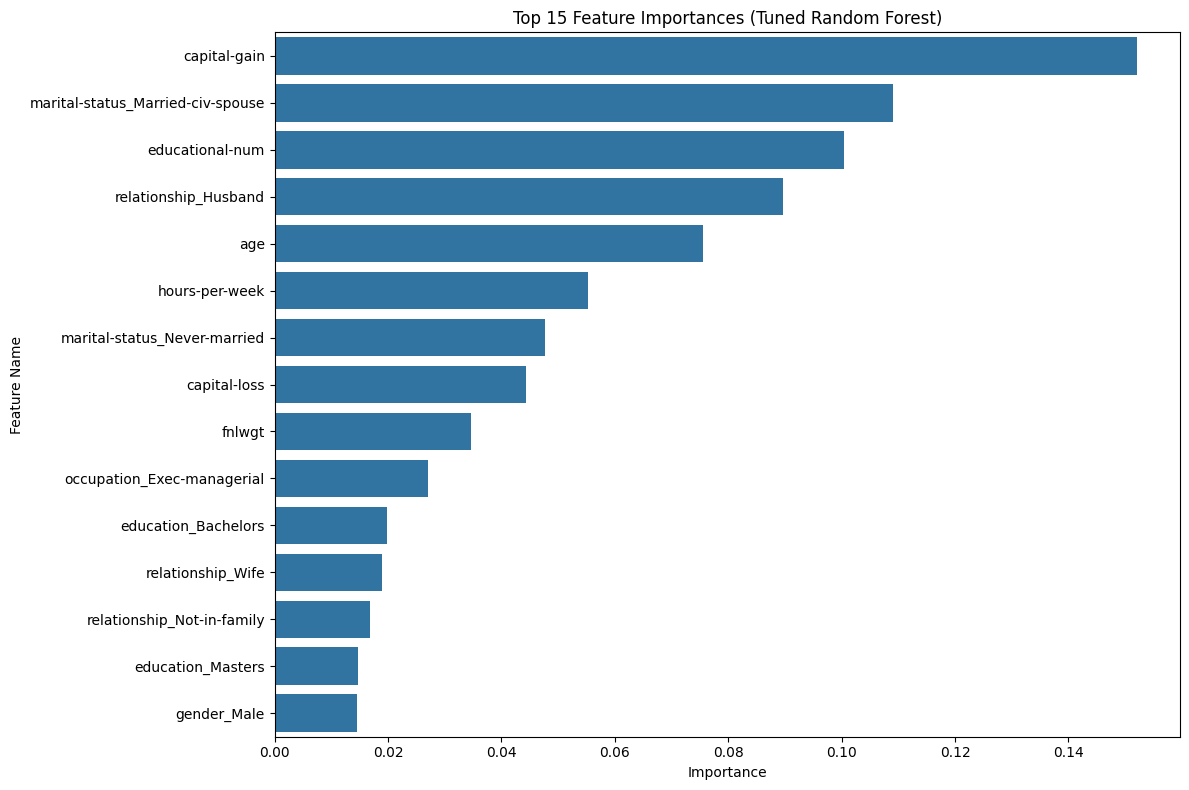

In [63]:
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances.head(15).values, y=feature_importances.head(15).index)
plt.title('Top 15 Feature Importances (Tuned Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()


In [64]:
print("\nProject completed. The models predict income based on the provided features.")
print("The tuned Random Forest model generally performs well, and feature importance helps understand key drivers.")



Project completed. The models predict income based on the provided features.
The tuned Random Forest model generally performs well, and feature importance helps understand key drivers.
